## Beans & Pods Coffee Shop Case Study
---
#### A Practical Data Science Primer

Goals:

1. Analyze the dataset provided by Beans & Pods Coffe Shop.
2. Look for patterns in the data.
3. Provide recommendations for a new marketing campaign.
4. Suggest additional data to collect for future analysis.
5. Prepare a presentation of the data.

In [1]:
# import all libraries as necessary
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# When working with matplotlib in Notebook environment: 
# output of plotting commands diplayed inline within the Notebook:
# Reference: https://www.statology.org/matplotlib-inline/
%matplotlib inline

#### How to read excel file stored locally with pandas:
 - https://stackoverflow.com/questions/46599016/reading-xlsx-file-using-jupyter-notebook
 - Print Excel sheet names with `sheet_names` method

In [2]:
path = ('./06_BeansDataSet.xlsx')
x1 = pd.ExcelFile(path)

print(x1.sheet_names)

['Beans  Pods data']


#### Load the Excel file into a dataframe:
 - Use the `read_excel` method

In [3]:
data = pd.read_excel('./06_BeansDataSet.xlsx')

# view the head of the dataset:
display(data.head(10))

,Channel,Region,Robusta,Arabica,Espresso,Lungo,Latte,Cappuccino
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Online,South,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Online,South,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Online,South,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Store,South,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Online,South,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


#### Clean up the data and get rid of the `NaN` values:
 - the `dropna` method will drop non-existent values
 - `how='all'` will drop rows which are ALL `NaN` values (drop rows which only contain NaN)
 - `how='any'` will drop rows which have ANY `NaN` values (some cells may contain data)

In [4]:
data.dropna(how = 'all', inplace = True)

# Now we can view the nice clean data values
display(data.head(10))

,Channel,Region,Robusta,Arabica,Espresso,Lungo,Latte,Cappuccino
1,Online,South,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
3,Online,South,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
5,Online,South,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
7,Store,South,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
9,Online,South,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0
11,Online,South,9413.0,8259.0,5126.0,666.0,1795.0,1451.0
13,Online,South,12126.0,3199.0,6975.0,480.0,3140.0,545.0
15,Online,South,7579.0,4956.0,9426.0,1669.0,3321.0,2566.0
17,Store,South,5963.0,3648.0,6192.0,425.0,1716.0,750.0
19,Online,South,6006.0,11093.0,18881.0,1159.0,7425.0,2098.0


#### Make a copy of the data to work with & display it:

In [5]:
df = data.copy()

display(df.head())

,Channel,Region,Robusta,Arabica,Espresso,Lungo,Latte,Cappuccino
1,Online,South,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
3,Online,South,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
5,Online,South,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
7,Store,South,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
9,Online,South,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


#### View dataframe info to check for irregularities:

In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 879
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Channel     440 non-null    object 
 1   Region      440 non-null    object 
 2   Robusta     440 non-null    float64
 3   Arabica     440 non-null    float64
 4   Espresso    440 non-null    float64
 5   Lungo       440 non-null    float64
 6   Latte       440 non-null    float64
 7   Cappuccino  440 non-null    float64
dtypes: float64(6), object(2)
memory usage: 30.9+ KB


None

#### View description of the dataset to check statistics:

In [7]:
display(df.describe())

,Robusta,Arabica,Espresso,Lungo,Latte,Cappuccino
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Explore, Dissect & Analyze Data
---

#### Show the copied DataFrame head:

In [8]:
display(df.head())

,Channel,Region,Robusta,Arabica,Espresso,Lungo,Latte,Cappuccino
1,Online,South,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
3,Online,South,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
5,Online,South,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
7,Store,South,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
9,Online,South,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


#### How many unique Regions are in the dataset?
 - There are 3

In [9]:
print(df.Region.nunique())

3


#### How many sales are in each region?
 - We know there are 3 unique Regions
 - display numerical values using the `value_counts()` method

In [10]:
print(df.Region.value_counts())

South      316
North       77
Central     47
Name: Region, dtype: int64


#### The same data in a more fancy bar graph:

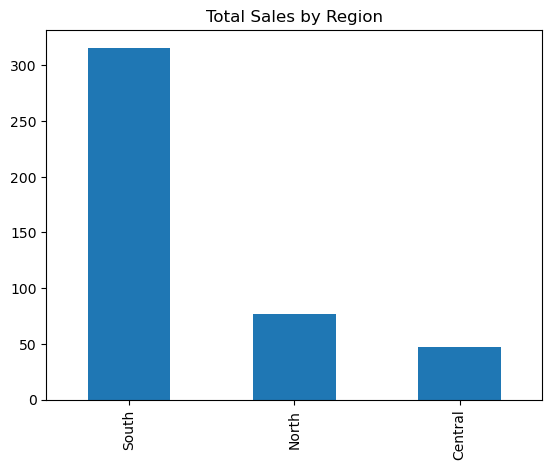

In [11]:
df.Region.value_counts().plot.bar(title='Total Sales by Region')
plt.show()

#### How many sales per channel?
 - use the `value_counts()` method again.

In [12]:
print(df.Channel.value_counts())

Store     298
Online    142
Name: Channel, dtype: int64


#### Display the same information as a bar graph:

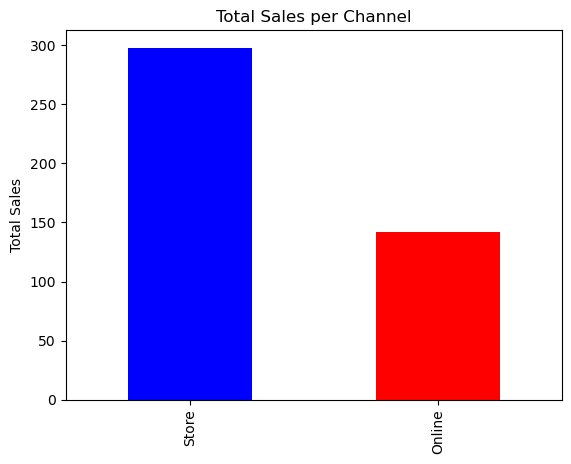

In [13]:
df.Channel.value_counts().plot.bar(ylabel='Total Sales', title="Total Sales per Channel", color=['blue', 'red'])
plt.show()

In [14]:
display(df.head())

,Channel,Region,Robusta,Arabica,Espresso,Lungo,Latte,Cappuccino
1,Online,South,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
3,Online,South,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
5,Online,South,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
7,Store,South,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
9,Online,South,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


#### Group by Channel and aggregate for another column, like Robusta and its values:
 - Notice that inside the `agg` method, we have a dictionary

In [15]:
display(df.groupby('Channel').agg({'Robusta':['min','max','mean','sum']}))

Robusta                                   
            min       max          mean        sum
Channel                                           
Online     18.0   44466.0   8904.323944  1264414.0
Store       3.0  112151.0  13475.560403  4015717.0

#### Plot the sum of sales for all products by Channel:

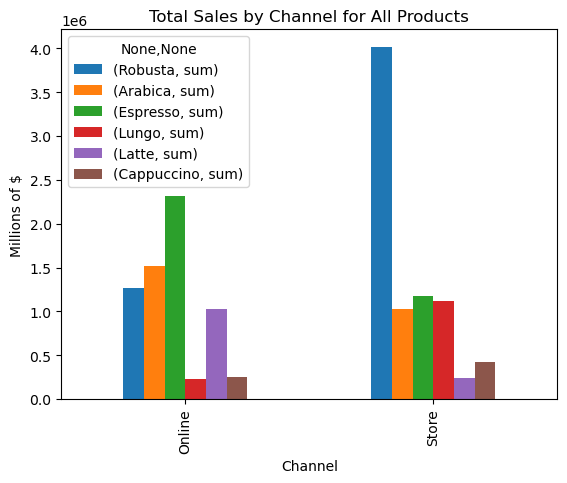

In [16]:
df.groupby('Channel').agg({'Robusta':['sum'],
                           'Arabica':['sum'],
                           'Espresso':['sum'],
                           'Lungo':['sum'],
                           'Latte':['sum'],
                           'Cappuccino':['sum'],}).plot.bar(ylabel = 'Millions of $', title = 'Total Sales by Channel for All Products')
plt.show()

#### Plot the mean and total of sales for all products by Channel:
 - Note the legend has been set to `False`
 - Display as a bar graph
 - Note that the mean values are too small to see

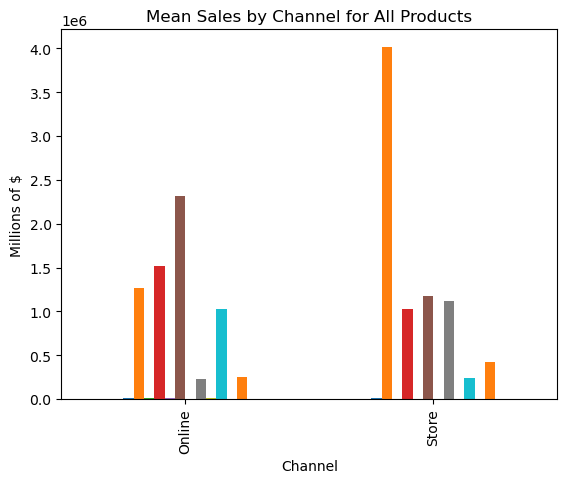

In [17]:
# store info as a new variable
channel_sales = df.groupby('Channel').agg({'Robusta':['mean','sum'],
                                           'Arabica':['mean','sum'],
                                           'Espresso':['mean','sum'],
                                           'Lungo':['mean','sum'],
                                           'Latte':['mean','sum'],
                                           'Cappuccino':['mean','sum'],})

channel_sales.plot.bar(legend = False,
                       ylabel = 'Millions of $',
                       title = 'Mean Sales by Channel for All Products')
plt.show()

#### What is the data type of our new variable?
 - It is a dataframe: so dataframe operations can be performed on it

In [18]:
print(type(channel_sales)) 

<class 'pandas.core.frame.DataFrame'>


#### Plot the mean and total of sales for all products by Region:
 - display as a bar graph
 - Note the legend has been set to false to unclutter the bar graph

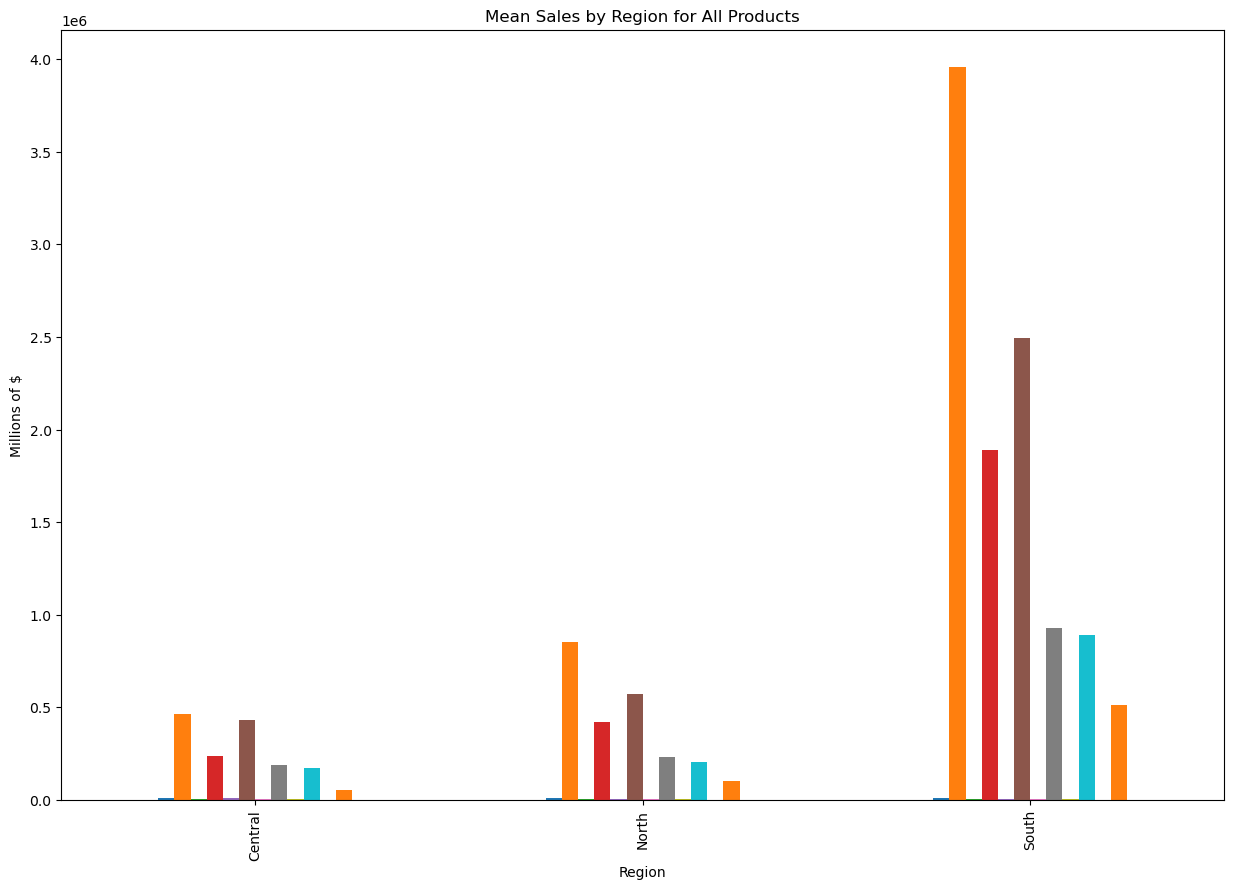

In [19]:
# store info as a new variable
region_sales = df.groupby('Region').agg({'Robusta':['mean','sum'],
                                         'Arabica':['mean','sum'],
                                         'Espresso':['mean','sum'],
                                         'Lungo':['mean','sum'],
                                         'Latte':['mean','sum'],
                                         'Cappuccino':['mean','sum'],})

# Note that the mean values are too small to see
region_sales.plot.bar(figsize=(15, 10),
                      legend=False,
                      ylabel='Millions of $',
                      title='Mean Sales by Region for All Products')
plt.show()

#### View the custom sales per channel & sales per region dataframe:

In [20]:
print('Sales Per Channel:')
display(channel_sales.head())

print('\n', 'Sales Per Region:')
display(region_sales.head())

Sales Per Channel:


Robusta                  Arabica                 Espresso  \
                 mean        sum          mean        sum          mean   
Channel                                                                   
Online    8904.323944  1264414.0  10716.500000  1521743.0  16322.852113   
Store    13475.560403  4015717.0   3451.724832  1028614.0   3962.137584   

                          Lungo                   Latte             \
               sum         mean        sum         mean        sum   
Channel                                                              
Online   2317845.0  1652.612676   234671.0  7269.507042  1032270.0   
Store    1180717.0  3748.251678  1116979.0   790.560403   235587.0   

          Cappuccino            
                mean       sum  
Channel                         
Online   1753.436620  248988.0  
Store    1415.956376  421955.0


 Sales Per Region:


Robusta                 Arabica                Espresso  \
                 mean        sum         mean        sum         mean   
Region                                                                  
Central   9887.680851   464721.0  5088.170213   239144.0  9218.595745   
North    11101.727273   854833.0  5486.415584   422454.0  7403.077922   
South    12533.471519  3960577.0  5977.085443  1888759.0  7896.363924   

                          Lungo                  Latte             Cappuccino  \
               sum         mean       sum         mean       sum         mean   
Region                                                                          
Central   433274.0  4045.361702  190132.0  3687.468085  173311.0  1159.702128   
North     570037.0  3000.337662  231026.0  2651.116883  204136.0  1354.896104   
South    2495251.0  2944.594937  930492.0  2817.753165  890410.0  1620.601266   

                   
              sum  
Region             
Central   54506.0  
North    104327.0  
South    512110.0

#### We still need a complete picture of where the best performers are
 - Display Channel Per Region Data
 - We don't know what region is best online or in store, so we need that data next.
 - This is much more comprehensive

In [21]:
sales = df.groupby(['Channel', 'Region']).agg({'Robusta':['mean','sum'],
                                               'Arabica':['mean','sum'],
                                               'Espresso':['mean','sum'],
                                               'Lungo':['mean','sum'],
                                               'Latte':['mean','sum'],
                                               'Cappuccino':['mean','sum']})
# Channel per Region:
display(sales.head(6))

Robusta                  Arabica             \
                         mean        sum          mean        sum   
Channel Region                                                      
Online  Central   7289.789474   138506.0   9190.789474   174625.0   
        North     5200.000000    93600.0  10784.000000   194112.0   
        South     9831.504762  1032308.0  10981.009524  1153006.0   
Store   Central  11650.535714   326215.0   2304.250000    64519.0   
        North    12902.254237   761233.0   3870.203390   228342.0   
        South    13878.052133  2928269.0   3486.981043   735753.0   

                     Espresso                   Lungo                  Latte  \
                         mean        sum         mean       sum         mean   
Channel Region                                                                 
Online  Central  16326.315789   310200.0  1540.578947   29271.0  8410.263158   
        North    18471.944444   332495.0  2584.111111   46514.0  8225.277778   
        South    15953.809524  1675150.0  1513.200000  158886.0  6899.238095   
Store   Central   4395.500000   123074.0  5745.035714  160861.0   482.714286   
        North     4026.135593   237542.0  3127.322034  184512.0   950.525424   
        South     3886.734597   820101.0  3656.900474  771606.0   786.682464   

                            Cappuccino            
                      sum         mean       sum  
Channel Region                                    
Online  Central  159795.0  1239.000000   23541.0  
        North    148055.0  1871.944444   33695.0  
        South    724420.0  1826.209524  191752.0  
Store   Central   13516.0  1105.892857   30965.0  
        North     56081.0  1197.152542   70632.0  
        South    165990.0  1518.284360  320358.0

#### Check info of the new combined dataframe:
 - Note that channel and region are no longer columns, they are the index of the dataframe
 - Note that each columns have 2 values now, instead of just 1

In [22]:
display(sales.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, ('Online', 'Central') to ('Store', 'South')
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Robusta, mean)     6 non-null      float64
 1   (Robusta, sum)      6 non-null      float64
 2   (Arabica, mean)     6 non-null      float64
 3   (Arabica, sum)      6 non-null      float64
 4   (Espresso, mean)    6 non-null      float64
 5   (Espresso, sum)     6 non-null      float64
 6   (Lungo, mean)       6 non-null      float64
 7   (Lungo, sum)        6 non-null      float64
 8   (Latte, mean)       6 non-null      float64
 9   (Latte, sum)        6 non-null      float64
 10  (Cappuccino, mean)  6 non-null      float64
 11  (Cappuccino, sum)   6 non-null      float64
dtypes: float64(12)
memory usage: 739.0+ bytes


None

#### More info on the columns:

In [23]:
print(sales.columns)

MultiIndex([(   'Robusta', 'mean'),
            (   'Robusta',  'sum'),
            (   'Arabica', 'mean'),
            (   'Arabica',  'sum'),
            (  'Espresso', 'mean'),
            (  'Espresso',  'sum'),
            (     'Lungo', 'mean'),
            (     'Lungo',  'sum'),
            (     'Latte', 'mean'),
            (     'Latte',  'sum'),
            ('Cappuccino', 'mean'),
            ('Cappuccino',  'sum')],
           )


#### More information on the indices:

In [24]:
print(sales.index)

MultiIndex([('Online', 'Central'),
            ('Online',   'North'),
            ('Online',   'South'),
            ( 'Store', 'Central'),
            ( 'Store',   'North'),
            ( 'Store',   'South')],
           names=['Channel', 'Region'])


#### Make a new copy of our custom sales dataframe
 - Make sure this is the data we want to work with

In [25]:
df1 = sales.copy()

display(df1.head(6))

Robusta                  Arabica             \
                         mean        sum          mean        sum   
Channel Region                                                      
Online  Central   7289.789474   138506.0   9190.789474   174625.0   
        North     5200.000000    93600.0  10784.000000   194112.0   
        South     9831.504762  1032308.0  10981.009524  1153006.0   
Store   Central  11650.535714   326215.0   2304.250000    64519.0   
        North    12902.254237   761233.0   3870.203390   228342.0   
        South    13878.052133  2928269.0   3486.981043   735753.0   

                     Espresso                   Lungo                  Latte  \
                         mean        sum         mean       sum         mean   
Channel Region                                                                 
Online  Central  16326.315789   310200.0  1540.578947   29271.0  8410.263158   
        North    18471.944444   332495.0  2584.111111   46514.0  8225.277778   
        South    15953.809524  1675150.0  1513.200000  158886.0  6899.238095   
Store   Central   4395.500000   123074.0  5745.035714  160861.0   482.714286   
        North     4026.135593   237542.0  3127.322034  184512.0   950.525424   
        South     3886.734597   820101.0  3656.900474  771606.0   786.682464   

                            Cappuccino            
                      sum         mean       sum  
Channel Region                                    
Online  Central  159795.0  1239.000000   23541.0  
        North    148055.0  1871.944444   33695.0  
        South    724420.0  1826.209524  191752.0  
Store   Central   13516.0  1105.892857   30965.0  
        North     56081.0  1197.152542   70632.0  
        South    165990.0  1518.284360  320358.0

#### Get the index with the `.loc` method
 - These are the data values for Online sales in the Central region by Product

In [26]:
print(df1.loc[('Online', 'Central')])

Robusta     mean      7289.789474
            sum     138506.000000
Arabica     mean      9190.789474
            sum     174625.000000
Espresso    mean     16326.315789
            sum     310200.000000
Lungo       mean      1540.578947
            sum      29271.000000
Latte       mean      8410.263158
            sum     159795.000000
Cappuccino  mean      1239.000000
            sum      23541.000000
Name: (Online, Central), dtype: float64


#### Create a bar plot of Online Sales in Central Region by Product:

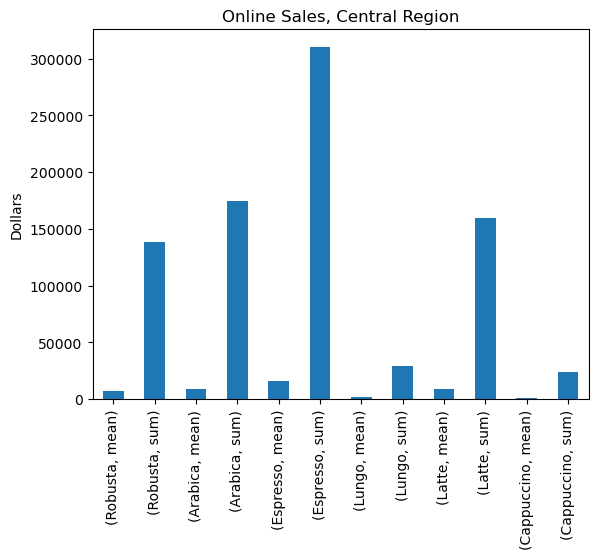

In [27]:
df1.loc[('Online', 'Central')].plot.bar(ylabel='Dollars', title='Online Sales, Central Region')
plt.show()

#### We don't need the mean, so we can make another dataframe:
 - Only includes `sum` data

In [28]:
sales1 = df.groupby(['Channel', 'Region']).agg({'Robusta':['sum'],
                                               'Arabica':['sum'],
                                               'Espresso':['sum'],
                                               'Lungo':['sum'],
                                               'Latte':['sum'],
                                               'Cappuccino':['sum']})

display(sales1.head(6))

Robusta    Arabica   Espresso     Lungo     Latte  \
                       sum        sum        sum       sum       sum   
Channel Region                                                         
Online  Central   138506.0   174625.0   310200.0   29271.0  159795.0   
        North      93600.0   194112.0   332495.0   46514.0  148055.0   
        South    1032308.0  1153006.0  1675150.0  158886.0  724420.0   
Store   Central   326215.0    64519.0   123074.0  160861.0   13516.0   
        North     761233.0   228342.0   237542.0  184512.0   56081.0   
        South    2928269.0   735753.0   820101.0  771606.0  165990.0   

                Cappuccino  
                       sum  
Channel Region              
Online  Central    23541.0  
        North      33695.0  
        South     191752.0  
Store   Central    30965.0  
        North      70632.0  
        South     320358.0

#### Alternative: Get sales data using pandas pivot table method:
 - Documentation: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
 - note that `data` from the beginning of this exercise can be replaced with `sales1`

In [29]:
sales_table = pd.pivot_table(data, values=['Robusta', 'Arabica', 'Espresso', 'Lungo', 'Latte', 'Cappuccino'], index=['Channel', 'Region'], aggfunc=np.sum)

display(sales_table)

Arabica  Cappuccino   Espresso     Latte     Lungo  \
Channel Region                                                          
Online  Central   174625.0     23541.0   310200.0  159795.0   29271.0   
        North     194112.0     33695.0   332495.0  148055.0   46514.0   
        South    1153006.0    191752.0  1675150.0  724420.0  158886.0   
Store   Central    64519.0     30965.0   123074.0   13516.0  160861.0   
        North     228342.0     70632.0   237542.0   56081.0  184512.0   
        South     735753.0    320358.0   820101.0  165990.0  771606.0   

                   Robusta  
Channel Region              
Online  Central   138506.0  
        North      93600.0  
        South    1032308.0  
Store   Central   326215.0  
        North     761233.0  
        South    2928269.0

#### Make a new copy the new sales dataframe:

In [30]:
df2 = sales1.copy()
df2.head(6)

Robusta    Arabica   Espresso     Lungo     Latte  \
                       sum        sum        sum       sum       sum   
Channel Region                                                         
Online  Central   138506.0   174625.0   310200.0   29271.0  159795.0   
        North      93600.0   194112.0   332495.0   46514.0  148055.0   
        South    1032308.0  1153006.0  1675150.0  158886.0  724420.0   
Store   Central   326215.0    64519.0   123074.0  160861.0   13516.0   
        North     761233.0   228342.0   237542.0  184512.0   56081.0   
        South    2928269.0   735753.0   820101.0  771606.0  165990.0   

                Cappuccino  
                       sum  
Channel Region              
Online  Central    23541.0  
        North      33695.0  
        South     191752.0  
Store   Central    30965.0  
        North      70632.0  
        South     320358.0

#### Create a new bar plot from the new dataframe using only the sum data:

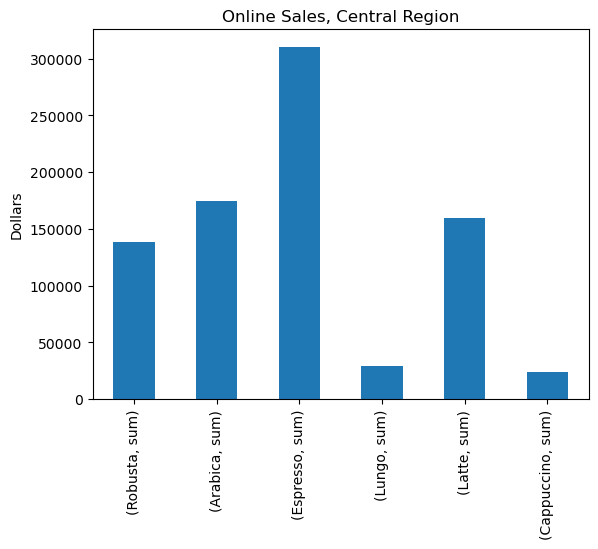

In [31]:
df2.loc[('Online', 'Central')].plot.bar(ylabel = 'Dollars', title = 'Online Sales, Central Region')
plt.show()

#### Plot all online sales for all regions:

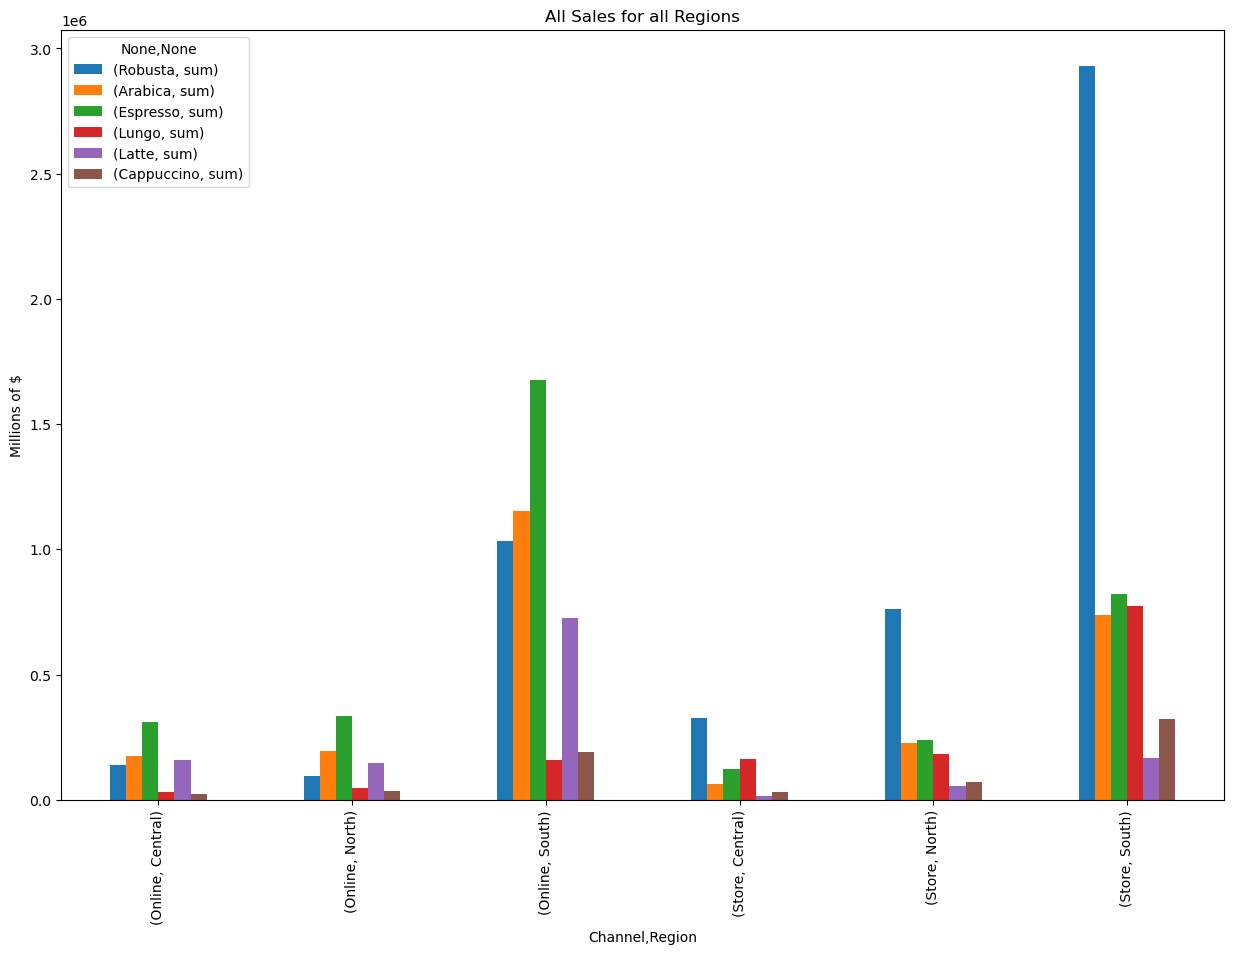

In [32]:
df2.loc[:].plot.bar(figsize=(15, 10), ylabel='Millions of $', title='All Sales for all Regions')
plt.show()

### Trend analysis so far:
---

Trends By Region:

1. Overall, the South region has the most sales revenue by far.
2. Overall, the Central region has the lowest sales revenue.

Trends by product:

1. For In-Store sales, all regions, Robusta grosses the most revenue by far.
2. For In-Store sales, all regions, Latte grosses the least revenue.
3. For Online sales, all regions, Espresso grosses the most revenue, followed by Arabica.
4. For Online sales, all regions, Lungo and Cappucino gross the least revenue.

### Seller Recommendations:
---
Problem: This data is only static. It needs to be dynamic, but we are missing time elements.

1. Need to add a time element to the data to make it dynamic and model the trends. When was the data logged? Growth or decline of sales over time would be very useful.

2. For In-Store sales, the sales can be tracked by individual salesman, and that can be tracked over time as a performance measure as well.

3. Build a recommendation system based on market analysis of items bought associated with customer profiles to reveal patterns. 

    3.1 This can be individual buyer based, where customer profiles and customer histories are linked to product recommendations based on their personal profile.
    
    3.2 This can be product based, where product profiles are linked together, so someone adds a certain product to their cart, they are recommended another due to the product's popularity of being bought with some other product.